# Equalização de histograma
- É um método de processamento de imagens que busca ajustar o contraste de uma imagem
- É útil para melhorar a visualização da imagem, mas também é usado como um pré-processamento de alguns métodos
- Mas antes, vamos dar uma olhada em como obter o histograma de uma imagem

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

- Carregando nossas imagens de exemplo

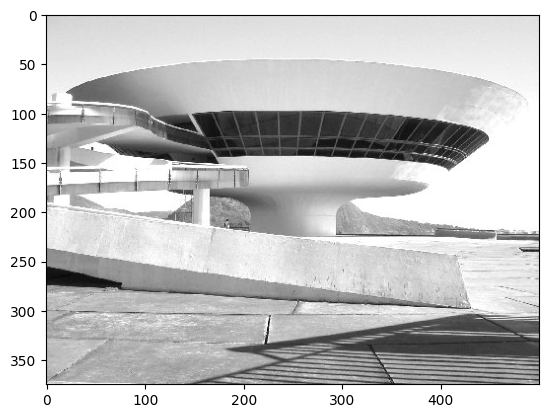

In [30]:
const = cv2.imread("assets/hist_ex.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(const, cmap="gray")

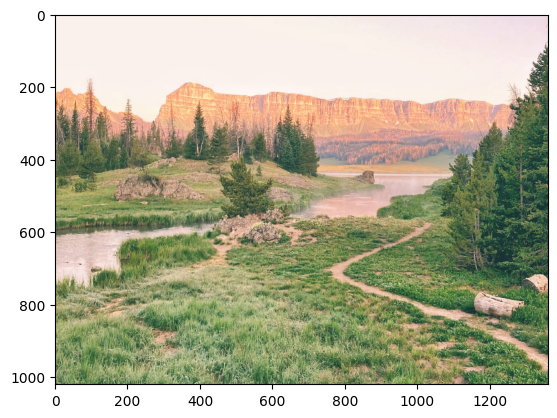

In [31]:
natureza = cv2.cvtColor(cv2.imread("assets/natureza.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(natureza)

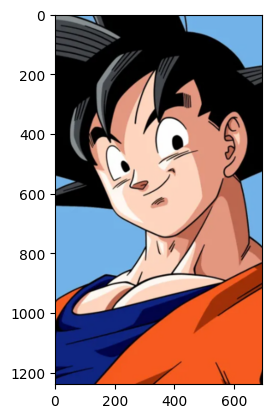

In [32]:
goku = cv2.cvtColor(cv2.imread("assets/goku.png"), cv2.COLOR_BGR2RGB)
plt.imshow(goku)

## Calculando o histograma
- Para calcular o histograma utilizamos o método `calcHist()`, que calcula o histograma de uma ou mais imagens
- Começando para uma imagem em tons de cinza

[(0.0, 256.0),
 Text(0.5, 1.0, 'Histograma de uma imagem em tons de cinza'),
 Text(0.5, 0, 'bins'),
 Text(0, 0.5, 'Nº de pixels')]

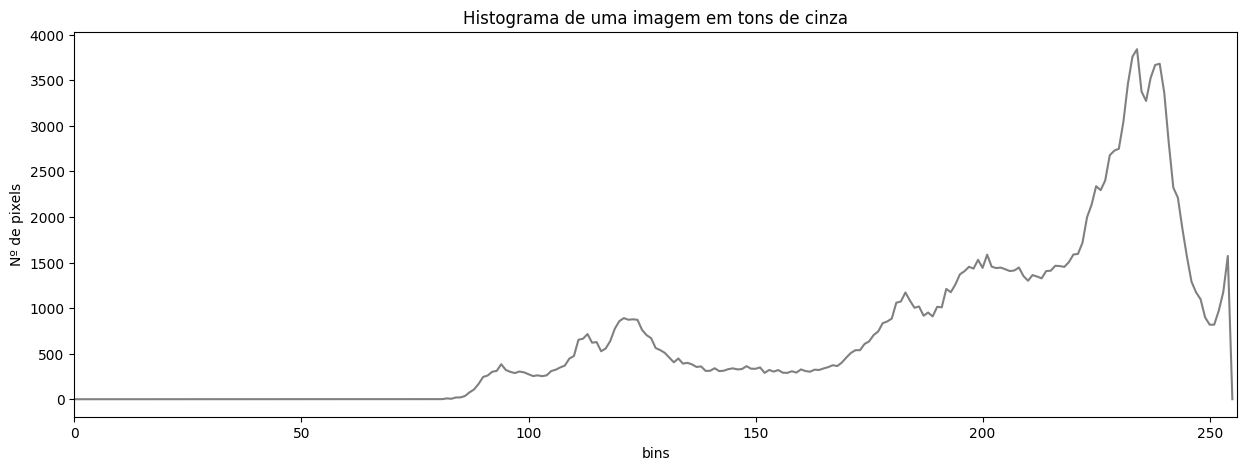

In [33]:
g_hist = cv2.calcHist([const], # lista de imagens que queremos calcular o histograma
                      [0], # canais que queremos calcular o histograma
                      None, # se quisermos calcular o histograma apenas para uma parte da imagem podemos passar uma máscara
                      [256], # lista de bins para cada uma das imagens 
                      [0, 255], # range de todos os pixels que pode ser calculado o histograma
                     )

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(g_hist, color="gray")
ax.set(xlim=[0, 256], title="Histograma de uma imagem em tons de cinza", xlabel="bins", ylabel="Nº de pixels")

- Se quisermos calcular o histograma apenas de uma parte da imagem, podemos criar uma mascara para isso

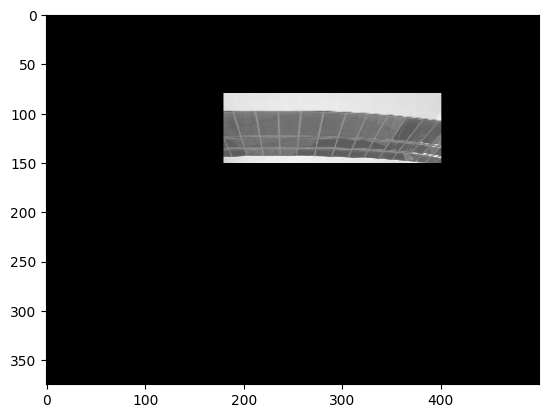

In [34]:
mask = cv2.rectangle(np.zeros_like(const, dtype=np.uint8), (180, 80), (400, 150), (255, 255, 255), thickness=cv2.FILLED )
masked_const = cv2.bitwise_and(const, mask)
plt.imshow(masked_const, cmap="gray")

[(0.0, 256.0),
 Text(0.5, 1.0, 'Histograma de uma imagem em tons de cinza'),
 Text(0.5, 0, 'bins'),
 Text(0, 0.5, 'Nº de pixels')]

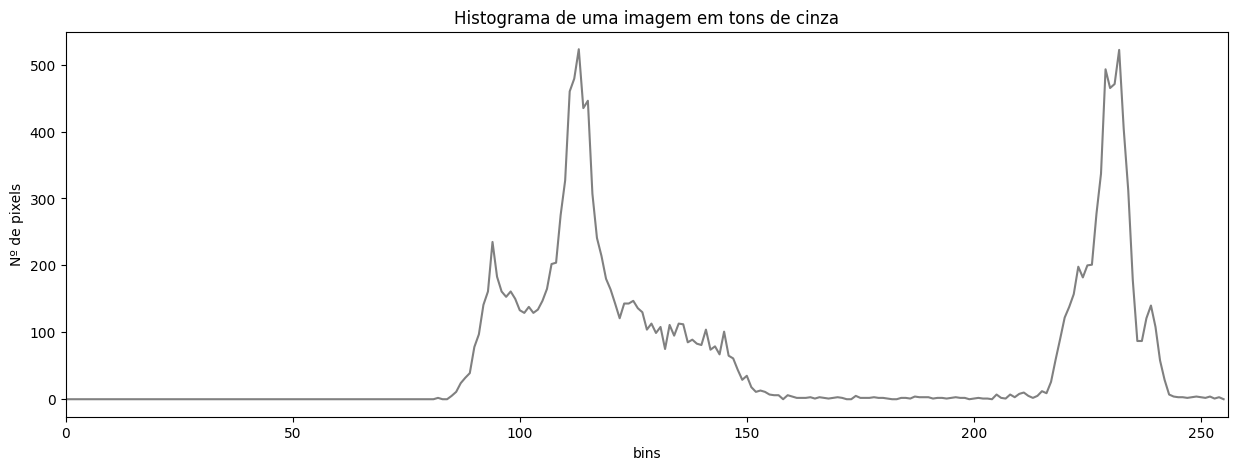

In [35]:
g_hist = cv2.calcHist([const], # lista de imagens que queremos calcular o histograma
                      [0], # canais que queremos calcular o histograma
                      mask, # se quisermos calcular o histograma apenas para uma parte da imagem podemos passar uma máscara
                      [256], # lista de bins para cada uma das imagens 
                      [0, 255], # range de todos os pixels que pode ser calculado o histograma
                     )

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(g_hist, color="gray")
ax.set(xlim=[0, 256], title="Histograma de uma imagem em tons de cinza", xlabel="bins", ylabel="Nº de pixels")

- Histograma de imagens coloridas
    - Neste caso, temos que fazer por canais

[(0.0, 256.0),
 Text(0.5, 1.0, 'Histograma dos 3 canais de uma imagem RGB'),
 Text(0.5, 0, 'bins'),
 Text(0, 0.5, 'Nº de pixels')]

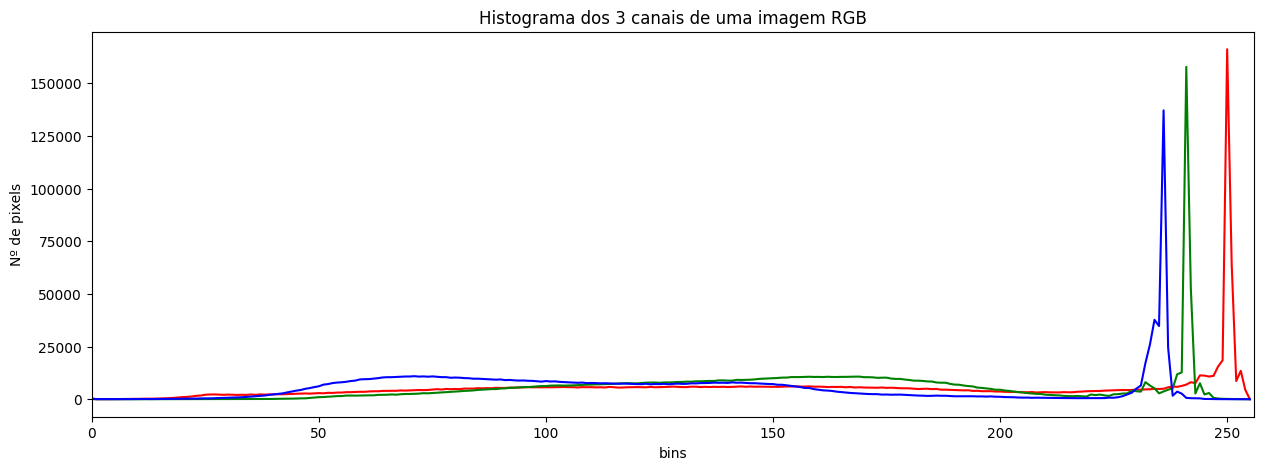

In [36]:
fig, ax = plt.subplots(figsize=[15, 5])
colors = ["r", "g", "b"]
for ch, c in enumerate(colors):
    c_hist = cv2.calcHist([natureza], [ch], None, [256], [0, 255])
    ax.plot(c_hist, color=c)    
ax.set(xlim=[0, 256], title="Histograma dos 3 canais de uma imagem RGB", xlabel="bins", ylabel="Nº de pixels")

## Realizando a equalização de histograma
- Como o nome sugere, a intenção da equalização é fazer com que a distribuição dos pixels fique mais uniforme
- A função `equalizeHist()` faz todo o trabalho

#### Equalização para imagem em níveis de cinza

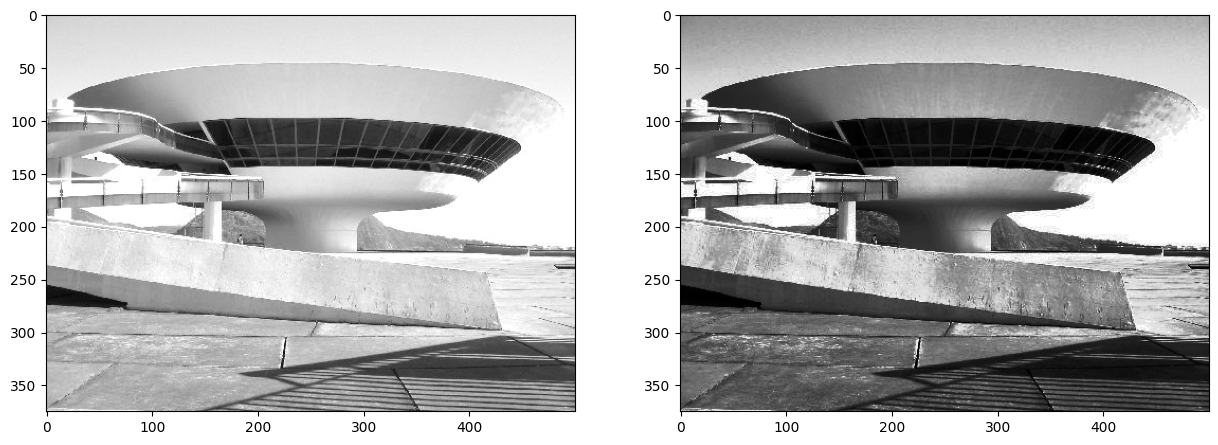

In [37]:
const_eq = cv2.equalizeHist(const)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax[0].imshow(const, cmap="gray")
ax[1].imshow(const_eq, cmap="gray")

#### Equalização para imagem colorida
- Neste caso, precisamos converter a imagem para um espaço de cor que possua a intensidade do pixel em um canal separado


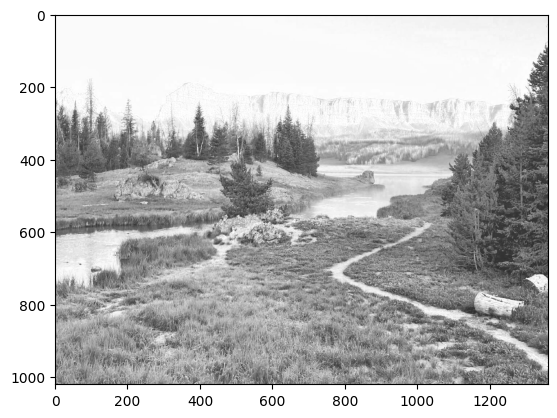

In [38]:
natureza_hsv = cv2.cvtColor(natureza, cv2.COLOR_RGB2HSV)
plt.imshow(natureza_hsv[:, :, 2], cmap="gray")

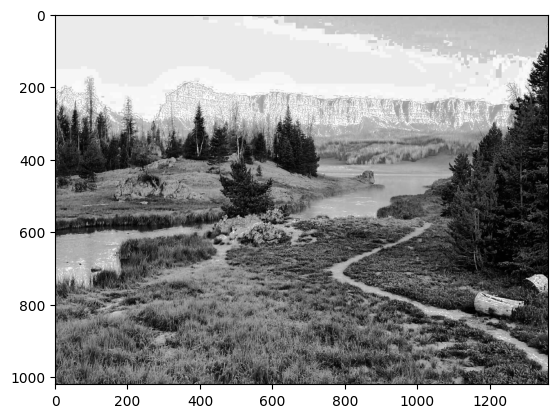

In [39]:
natureza_hsv_eq = natureza_hsv.copy()
natureza_hsv_eq[:, :, 2] = cv2.equalizeHist(natureza_hsv[:, :, 2])
plt.imshow(natureza_hsv_eq[:, :, 2], cmap="gray")

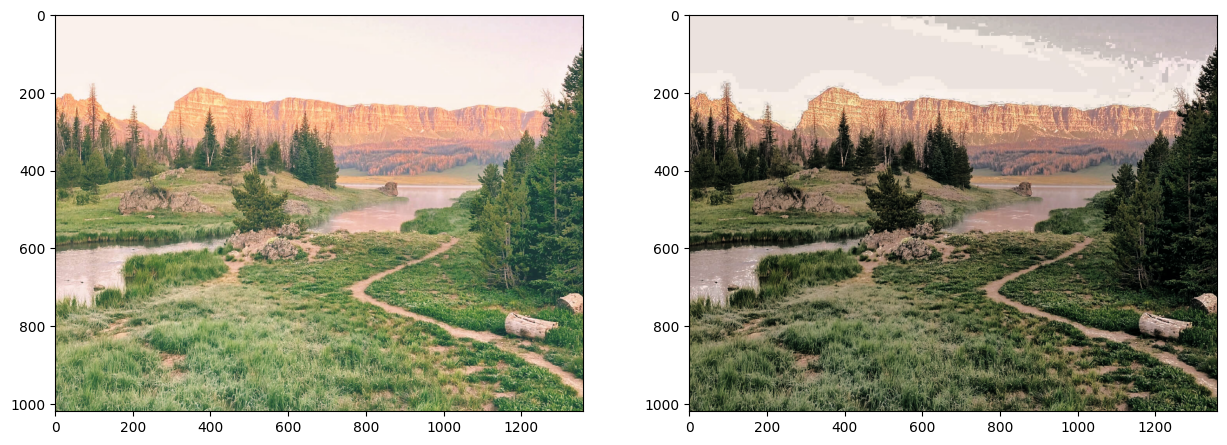

In [40]:
natureza_eq = cv2.cvtColor(natureza_hsv_eq, cv2.COLOR_HSV2RGB)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax[0].imshow(natureza)
ax[1].imshow(natureza_eq)

____
# Exercício
- Repita o exercício acima usando os métodos `cv2.split()` e `cv2.merge()`
___

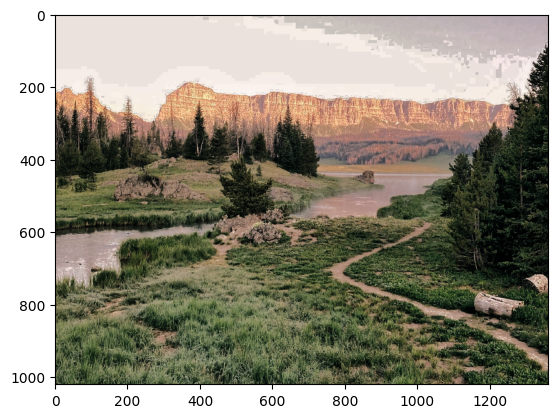

In [51]:
h, s, v = cv2.split(natureza_hsv)
v_eq = cv2.equalizeHist(v)
new_img = cv2.merge((h, s, v_eq))

new_img_rgb = cv2.cvtColor(new_img, cv2.COLOR_HSV2RGB)
plt.imshow(new_img_rgb)